In [ ]:
#Как итог берем 1.5% подъема против 0.5% падения
#для дальнейшего рассмотрения еще интересны 2% к 0.5%
#при построении моделей можно будет поиграться

In [152]:
import numpy as np
import pandas as pd
from tqdm import tqdm
list(getattr(tqdm, '_instances'))
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import pickle
def dump_pkl(data, filename):
  with open(filename, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(filename):
  with open(filename, 'rb') as handle:
    data = pickle.load(handle)
  return data

In [156]:
dfs = []

stocks = [
          'GAZP',
          'SBER',
          'LKOH',
          'MGNT',
          'NVTK',
          'SNGS', 'SNGSP',
          'GMKN',
          'ROSN',
          'NLMK',
          'TATN',
          'MTSS',
          'ALRS',  
          'YDEX',
          'CHMF',
          
          'MAGN',
          'T',
          'OZON',
          'RUAL'  
         ]
for stock in tqdm(stocks):
    df = load_pkl(f"./data/preproc/1min/{stock}.pkl")
    dfs += [df.copy()]
    assert (df['time'].sort_values()  == df['time']).all(), f'{stock} not sorted: {(df['time'].sort_values()  != df['time']).sum()}'
    assert not df['time'].duplicated().any(), f'{stock} duplicated: {df['time'].duplicated().sum()}'


df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df.shape

100%|█████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 32.22it/s]


(8666393, 7)

In [157]:
df.head()

,time,open,close,volume,low,high,ticker
0,2022-10-03 10:00:00,219.00,219.93,87793.0,218.00,220.25,GAZP
1,2022-10-03 10:01:00,219.80,220.08,61549.0,219.07,220.55,GAZP
2,2022-10-03 10:02:00,220.24,219.34,52640.0,219.02,220.38,GAZP
3,2022-10-03 10:03:00,219.17,218.96,61506.0,217.70,219.40,GAZP
4,2022-10-03 10:04:00,218.82,218.30,51464.0,217.76,218.96,GAZP


In [167]:
indx = random.sample(range(df.shape[0]), 100_000)
#idx

In [169]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, days_to_wait=1)

TypeError: get_df_target() got an unexpected keyword argument 'days_to_wait'

In [171]:
df_result

,ind,time,close,result,ticker,delta_time,res_price,res_ind,delta_time_hours,target
0,6673118,2024-02-23 15:37:00,1576.600,DNF,CHMF,-1,-1.000,-1,42,0
1,3177019,2024-11-27 14:58:00,60.040,LOSE,SNGSP,0 days 00:46:00,59.525,3177065,1.0,0
2,6198846,2023-12-22 13:50:00,2284.500,DNF,YDEX,-1,-1.000,-1,42,0
3,2043717,2023-09-01 11:58:00,1684.400,DNF,NVTK,-1,-1.000,-1,42,0
4,6941203,2023-03-16 20:59:00,40.275,DNF,MAGN,-1,-1.000,-1,42,0
...,...,...,...,...,...,...,...,...,...,...
99995,7699032,2024-09-19 20:31:00,2475.000,DNF,T,-1,-1.000,-1,42,0
99996,8551310,2024-06-03 22:35:00,42.215,DNF,RUAL,-1,-1.000,-1,42,0
99997,2577013,2024-02-09 17:45:00,29.925,WIN,SNGS,0 days 00:02:00,30.075,2577015,1.0,1
99998,2929090,2023-09-07 21:46:00,48.965,DNF,SNGSP,-1,-1.000,-1,42,0


In [51]:
df_result['result'].value_counts(normalize=True)

result
LOSE    0.63984
WIN     0.20356
DNF     0.15660
Name: proportion, dtype: float64

In [62]:
df_result['result'].value_counts(normalize=True)

result
LOSE    0.67853
WIN     0.17626
DNF     0.14521
Name: proportion, dtype: float64

In [68]:
#по часу выполнения посмотреть

In [72]:
df_result['delta_time_days'] = None
mask = df_result['result'] != 'DNF'
df_result.loc[mask, 'delta_time_days'] = np.ceil(df_result.loc[mask, 'delta_time'] / pd.Timedelta(hours=1))
df_result.loc[~mask, 'delta_time_days'] = 42

AttributeError: Rectangle.set() got an unexpected keyword argument 'rotation'

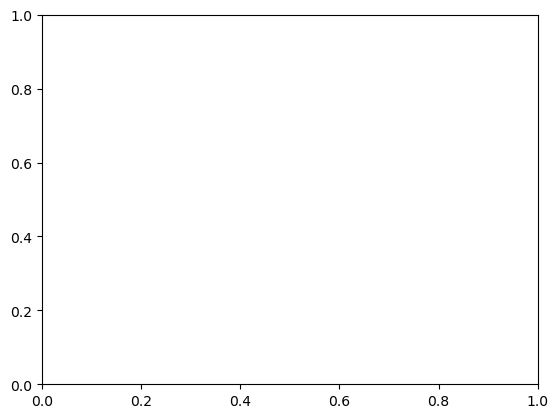

In [76]:
#распределение по длительности
df_result['delta_time_days'].value_counts(normalize=True).sort_index().plot.bar(rotation=90)

In [20]:
#TR по дням ожидания

In [21]:
df_result['target'] = (df_result['result'] == 'WIN').astype(int)

<Axes: xlabel='delta_time_days'>

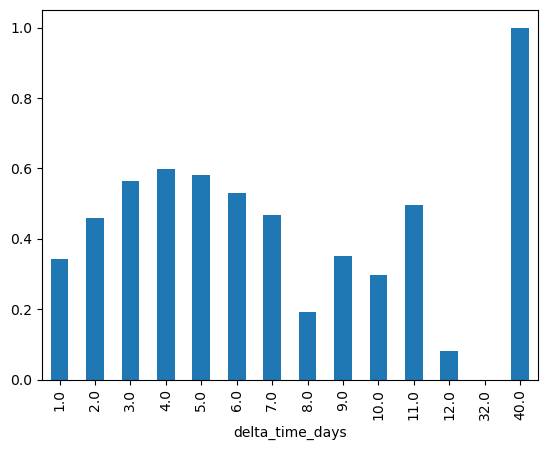

In [22]:
df_result.groupby('delta_time_days').target.mean().sort_index().plot.bar()

In [23]:
#TR во времени

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_33212/2486965488.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_result.groupby(pd.Grouper(key='time', freq='M')).target.mean().sort_index().plot.bar()


<Axes: xlabel='time'>

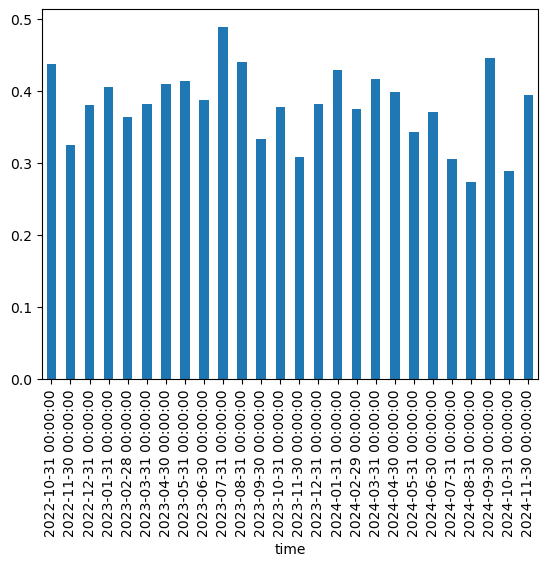

In [24]:
df_result.groupby(pd.Grouper(key='time', freq='M')).target.mean().sort_index().plot.bar()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_33212/539452958.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()


<Axes: xlabel='time'>

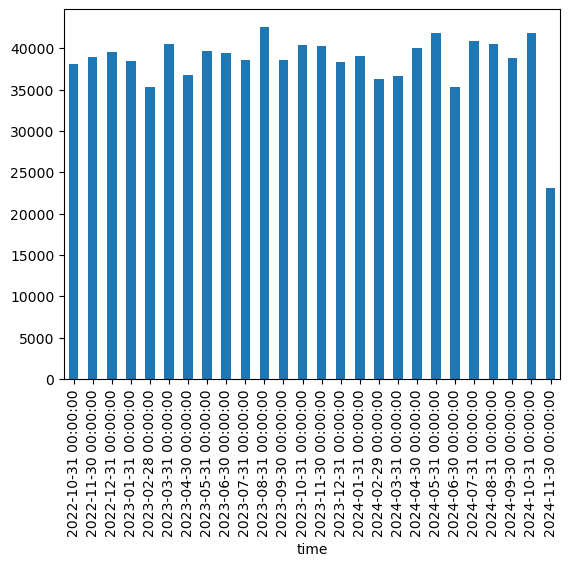

In [25]:
#перепроверка, кол-во точек в каждом месяце
df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()

<Axes: xlabel='time'>

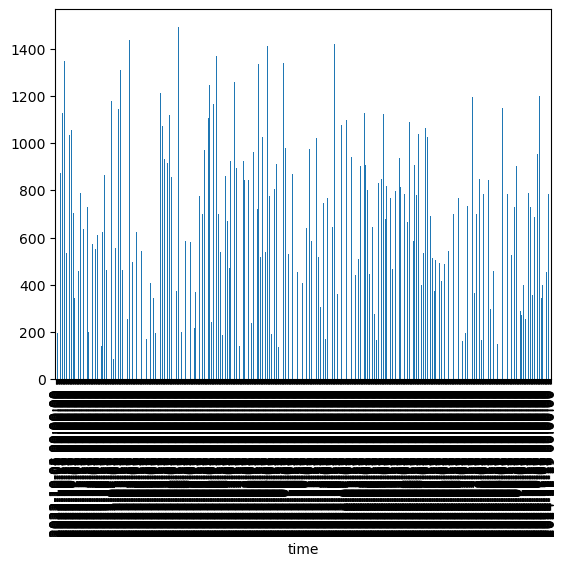

In [26]:
#распределение по дням
df_result.groupby(pd.Grouper(key='time', freq='D')).target.sum().sort_index().plot.bar()

In [37]:
df_result.groupby(pd.Grouper(key='time', freq='D')).target.sum().quantile([0.001] + np.arange(0.1, 1, 0.1).tolist() + [0.99])

0.001       0.00
0.100       0.00
0.200       0.00
0.300     145.40
0.400     317.20
0.500     450.00
0.600     601.40
0.700     753.60
0.800     877.80
0.900    1101.60
0.990    1407.54
Name: target, dtype: float64

In [ ]:
#выходные

In [40]:
2/7, (df_result.groupby(pd.Grouper(key='time', freq='D')).target.sum() == 0).mean()

(0.2857142857142857, 0.2862644415917843)

<Axes: xlabel='ticker'>

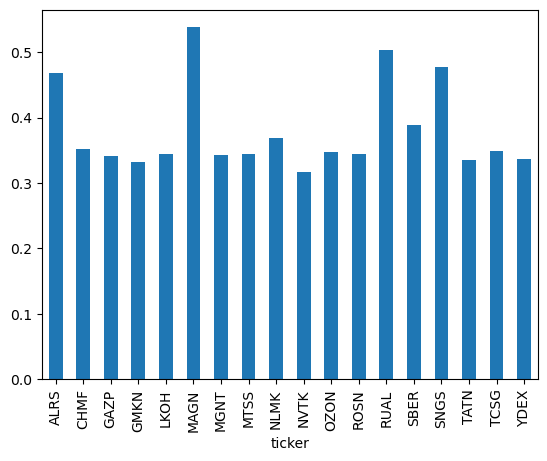

In [43]:
#по акциям
df_result.groupby('ticker').target.mean().sort_index().plot.bar()

<Axes: xlabel='ticker'>

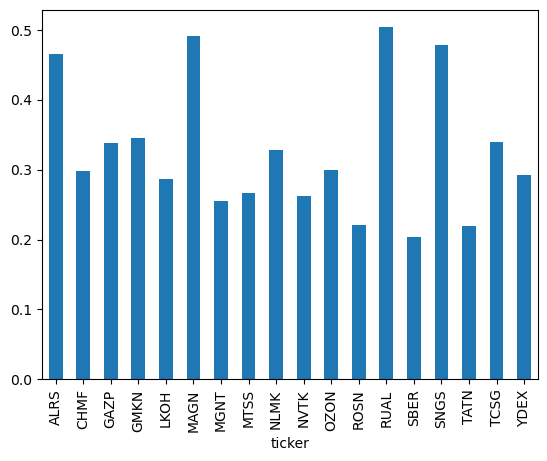

In [44]:
# по компаниям за два последних месяца
mask = df_result['time'] > datetime.datetime(2024, 10, 1)
df_result.loc[mask, :].groupby('ticker').target.mean().sort_index().plot.bar()

In [45]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, days_to_wait=7)

100%|███████████████████████████████| 1000000/1000000 [07:19<00:00, 2275.09it/s]


In [46]:
#по дню выполнения посмотреть

In [47]:
df_result['result'].value_counts()

result
LOSE    685077
WIN     313305
DNF       1618
Name: count, dtype: int64

In [85]:
0.6887*0.994 + 0.313*1.014

1.0019498

In [49]:
df_result['delta_time_days'] = None
mask = df_result['result'] != 'DNF'
df_result.loc[mask, 'delta_time_days'] = np.ceil(df_result.loc[mask, 'delta_time'] / pd.Timedelta(hours=24))
df_result.loc[~mask, 'delta_time_days'] = 8

<Axes: xlabel='delta_time_days'>

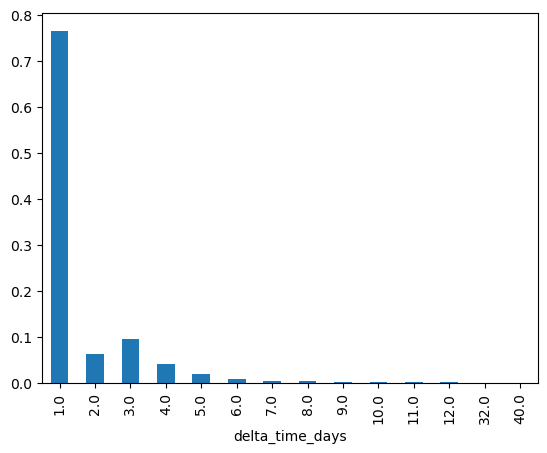

In [50]:
#распределение по длительности
df_result['delta_time_days'].value_counts(normalize=True).sort_index().plot.bar()

In [51]:
#TR по дням ожидания

In [52]:
df_result['target'] = (df_result['result'] == 'WIN').astype(int)

<Axes: xlabel='delta_time_days'>

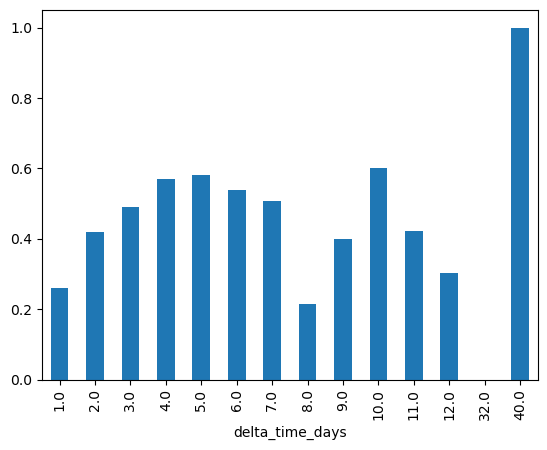

In [53]:
df_result.groupby('delta_time_days').target.mean().sort_index().plot.bar()

In [54]:
#TR во времени

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_33212/2486965488.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_result.groupby(pd.Grouper(key='time', freq='M')).target.mean().sort_index().plot.bar()


<Axes: xlabel='time'>

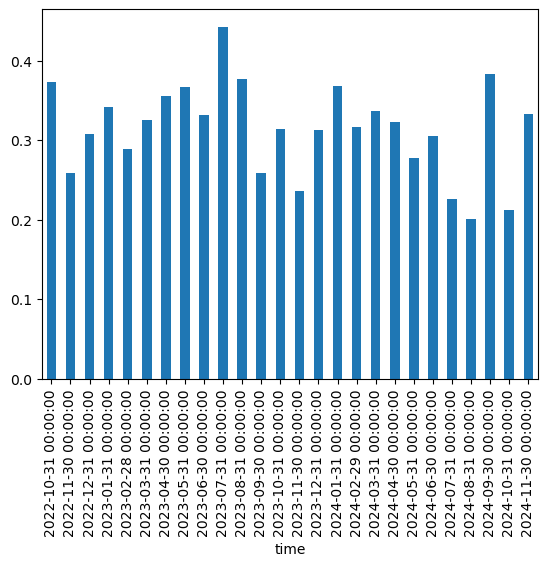

In [55]:
df_result.groupby(pd.Grouper(key='time', freq='M')).target.mean().sort_index().plot.bar()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_33212/539452958.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()


<Axes: xlabel='time'>

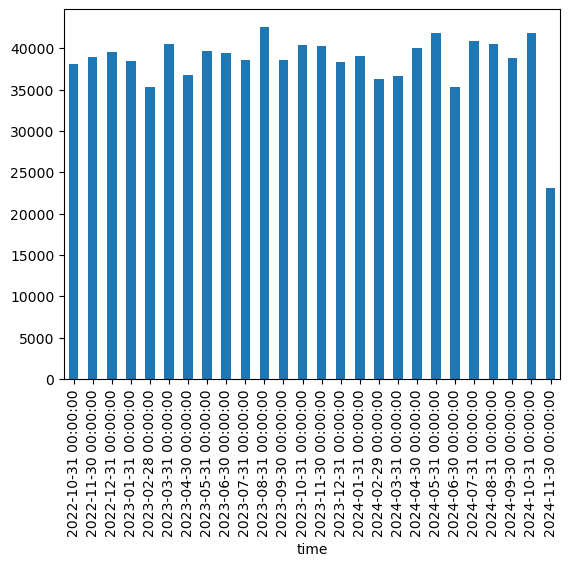

In [56]:
#перепроверка, кол-во точек в каждом месяце
df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()

<Axes: xlabel='time'>

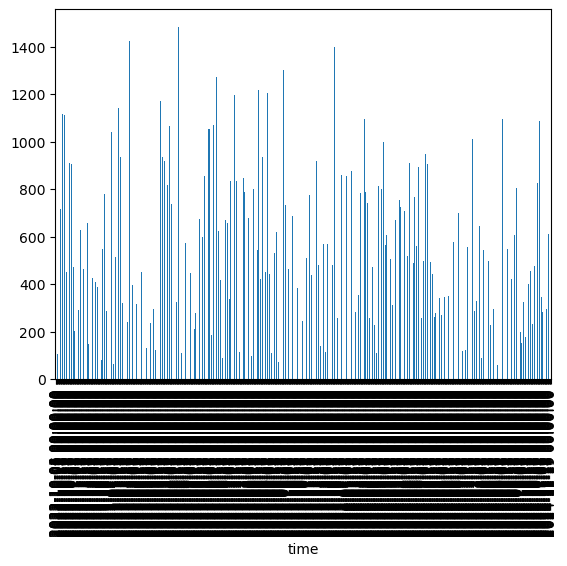

In [57]:
#распределение по дням
df_result.groupby(pd.Grouper(key='time', freq='D')).target.sum().sort_index().plot.bar()

<Axes: xlabel='ticker'>

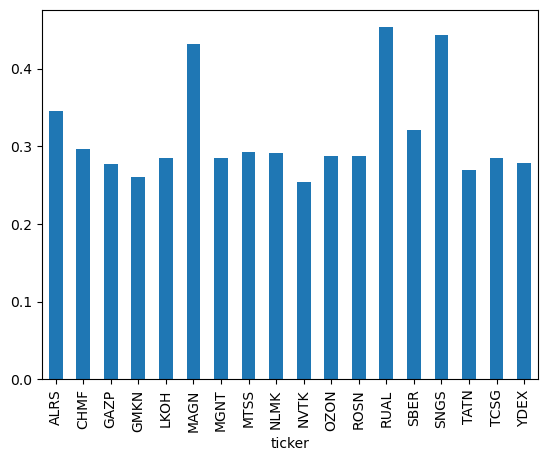

In [58]:
#по акциям
df_result.groupby('ticker').target.mean().sort_index().plot.bar()

<Axes: xlabel='ticker'>

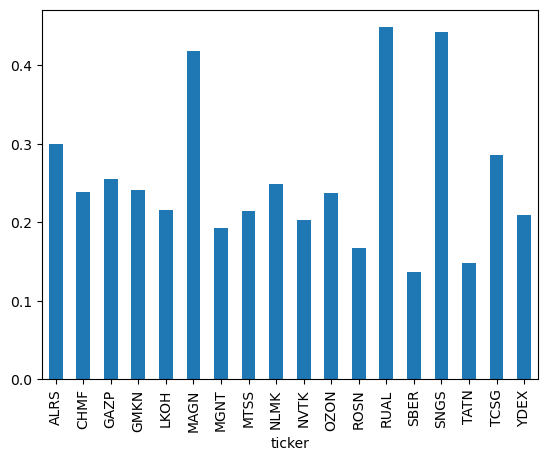

In [60]:
# по компаниям за два последних месяца
mask = df_result['time'] > datetime.datetime(2024, 10, 1)
df_result.loc[mask, :].groupby('ticker').target.mean().sort_index().plot.bar()

# 5. 1 день ожидания

### Посчитаем мат. ожидание лучших процентов

In [173]:
# Используем уже знакомую функцию :)

def get_target(df_all, ind, val_first, val_second, hours_to_wait):
    #цель - достичь val_second, не достигнув val_first

    points_in_hour = 60 # час
    points_to_wait = int(hours_to_wait * points_in_hour)
    ind_end = min(ind+points_to_wait+1, df_all.shape[0])
    
    df = df_all.iloc[ind:ind_end].copy()
    
    mask_stock = np.array(df['ticker'] == df['ticker'].iloc[0])
    df = df.loc[mask_stock, :]
    
    if val_first < val_second:                                 
        mask_val_first = np.array(df['close'] < val_first)     #### ХОТЯ БЫ ТАК, уже с 20 до 18 опусает WinRate (смена close -> low). Удалил это
        mask_val_second = np.array(df['close'] > val_second)
    else: 
        mask_val_first = np.array(df['close'] > val_first)      ### тут будущему мне поразбираться нужно будет
        mask_val_second = np.array(df['close'] < val_second)

    
    if (mask_val_first.sum() == 0) & (mask_val_second.sum() == 0):
        return 'DNF', -1, -1, -1
        
    if (mask_val_first.sum() == 0) & (mask_val_second.sum() != 0):
        ind_val_second = np.argwhere(mask_val_second).ravel()[0]
        delta_time = df['time'].iloc[ind_val_second] - df['time'].iloc[0]
        res_price = df['close'].iloc[ind_val_second]
        return 'WIN', delta_time, res_price, ind_val_second+ind
        
    if (mask_val_first.sum() != 0) & (mask_val_second.sum() == 0):
        ind_val_first = np.argwhere(mask_val_first).ravel()[0]
        delta_time = df['time'].iloc[ind_val_first] - df['time'].iloc[0]
        res_price = df['close'].iloc[ind_val_first]
        return 'LOSE', delta_time, res_price, ind_val_first+ind

    if (mask_val_first.sum() != 0) & (mask_val_second.sum() != 0):
        ind_val_first = np.argwhere(mask_val_first).ravel()[0]
        ind_val_second = np.argwhere(mask_val_second).ravel()[0]
        if ind_val_first < ind_val_second:
            delta_time = df['time'].iloc[ind_val_first] - df['time'].iloc[0]
            res_price = df['close'].iloc[ind_val_first]
            return 'LOSE', delta_time, res_price, ind_val_first+ind
        if ind_val_first > ind_val_second:
            delta_time = df['time'].iloc[ind_val_second] - df['time'].iloc[0]
            res_price = df['close'].iloc[ind_val_second]
            return 'WIN', delta_time, res_price, ind_val_second+ind


def get_df_target(df, indx, percent_first=None, percent_second=None, hours_to_wait=None):
    times = []
    results = []
    delta_times = []
    closes = []
    tickers = []
    res_prices = []
    res_inds = []
    
    #for ind in indx:
    for ind in tqdm(indx):
        time = df['time'].iloc[ind]
        close = df['close'].iloc[ind]
        ticker = df['ticker'].iloc[ind]
        
        val_first = df['close'].iloc[ind] * percent_first
        val_second = df['close'].iloc[ind] * percent_second
        result, delta_time, res_price, res_ind = get_target(df, ind, val_first, val_second, hours_to_wait)
        
        times += [time]
        closes += [close]
        tickers += [ticker]
        results += [result]
        delta_times += [delta_time]
        res_prices += [res_price]
        res_inds += [res_ind]
        

    df_result = pd.DataFrame({'ind' : indx,
                              'time' : times,
                              'close' : closes,
                              'result' : results,
                              'ticker' : tickers, 
                              'delta_time' : delta_times,
                              'res_price' : res_prices,
                              'res_ind' : res_inds
                             })
    return df_result    

In [36]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=14) #14 hours = 1day

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4263.41it/s]


In [38]:
df_result.iloc[:10]

,ind,time,close,result,ticker,delta_time,res_price,res_ind
0,6673118,2024-02-23 15:37:00,1576.600,WIN,CHMF,2 days 18:23:00,1605.000,6673305
1,3177019,2024-11-27 14:58:00,60.040,LOSE,SNGSP,0 days 00:46:00,59.525,3177065
2,6198846,2023-12-22 13:50:00,2284.500,WIN,YDEX,2 days 23:00:00,2319.000,6199583
3,2043717,2023-09-01 11:58:00,1684.400,DNF,NVTK,-1,-1.000,-1
4,6941203,2023-03-16 20:59:00,40.275,WIN,MAGN,0 days 14:47:00,40.900,6941478
5,802570,2024-05-09 13:32:00,311.600,DNF,SBER,-1,-1.000,-1
6,1733800,2024-05-24 17:01:00,8112.500,LOSE,MGNT,0 days 04:46:00,8069.500,1734057
7,6740058,2024-06-20 18:27:00,1572.400,LOSE,CHMF,0 days 01:22:00,1563.000,6740121
8,5320847,2024-03-14 17:20:00,291.550,DNF,MTSS,-1,-1.000,-1
9,2869996,2023-05-26 10:23:00,30.285,WIN,SNGSP,0 days 04:41:00,30.765,2870277


In [40]:
df_result['result'].value_counts(normalize=True)

result
LOSE    0.64113
WIN     0.20795
DNF     0.15092
Name: proportion, dtype: float64

In [119]:
#переберем
#неплохо бы пересчитать с учетом включения вечерних торгов
l_percent_first = []
l_percent_second = []
l_percent_win = []
l_percent_lose = []
l_results = []

for percent_first in tqdm(np.arange(0.001, 0.031, 0.001)):
    for percent_second in np.arange(0.001, 0.031, 0.001):
        df_result = get_df_target(df, indx[:10_000], percent_first=1-percent_first, percent_second=1+percent_second, hours_to_wait=14)

        percent_win = df_result['result'].value_counts(normalize=True).loc['WIN']
        percent_lose = 1 - percent_win

        result = (1-percent_first-0.001)*percent_lose + (1+percent_second-0.001)*percent_win



        l_percent_win += [percent_win]
        l_percent_lose += [percent_lose]       
        l_percent_first += [1-percent_first]
        l_percent_second += [1+percent_second]
        l_results += [result]


df_percent = pd.DataFrame({'percent_first' : l_percent_first,
                          'percent_second' : l_percent_second,
                          'percent_win' : l_percent_win,
                          'percent_lose' : l_percent_lose, 
                          'E_game': l_results
                          })


100%|█████████████████████████████████████████████████████████████████████████| 30/30 [35:41<00:00, 71.40s/it]


In [149]:
#сохраним наше исследование
dump_pkl(df_percent, 'E_game.pkl')

In [129]:
df_percent.sort_values(by='E_game', ascending=False).iloc[:20]

,percent_first,percent_second,percent_win,percent_lose,E_game
10,0.999,1.011,0.0751,0.9249,0.998901
9,0.999,1.010,0.0819,0.9181,0.998901
11,0.999,1.012,0.0672,0.9328,0.998874
8,0.999,1.009,0.0872,0.9128,0.998872
7,0.999,1.008,0.0962,0.9038,0.998866
6,0.999,1.007,0.1071,0.8929,0.998857
12,0.999,1.013,0.0611,0.9389,0.998855
4,0.999,1.005,0.1418,0.8582,0.998851
5,0.999,1.006,0.1210,0.8790,0.998847
3,0.999,1.004,0.1665,0.8335,0.998833


In [127]:
mask1 = df_percent.percent_first == 0.99
mask2 = df_percent.percent_second == 1.02
df_percent[mask1&mask2].sort_values(by='E_game', ascending=False)

,percent_first,percent_second,percent_win,percent_lose,E_game
289,0.99,1.02,0.1504,0.8496,0.993512


In [134]:
mask1 = df_percent.percent_first == 0.98
mask2 = df_percent.percent_second == 1.02
df_percent[mask1&mask2].sort_values(by='E_game', ascending=False)

,percent_first,percent_second,percent_win,percent_lose,E_game
589,0.98,1.02,0.172,0.828,0.98588


In [138]:
mask1 = df_percent.percent_first == 0.995
mask2 = df_percent.percent_second == 1.015
df_percent[mask1&mask2].sort_values(by='E_game', ascending=False)

,percent_first,percent_second,percent_win,percent_lose,E_game
134,0.995,1.015,0.1718,0.8282,0.997436


In [178]:
mask1 = df_percent.percent_first == 0.995
mask2 = df_percent.percent_second == 1.01
df_percent[mask1&mask2].sort_values(by='E_game', ascending=False)

,percent_first,percent_second,percent_win,percent_lose,E_game
129,0.995,1.01,0.2658,0.7342,0.997987


In [140]:
mask1 = df_percent.percent_first == 0.995
mask2 = df_percent.percent_second == 1.02
df_percent[mask1&mask2].sort_values(by='E_game', ascending=False)

,percent_first,percent_second,percent_win,percent_lose,E_game
139,0.995,1.02,0.1123,0.8877,0.996807


### Оценим изменеие дневной цены

In [42]:
diffs = []
for stock in tqdm(stocks):
    df_day = load_pkl(f"./data/preproc/1day/{stock}.pkl")

    diffs += df_day['close'].pct_change().tolist()[1:]
len(diffs)

100%|████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 925.69it/s]


10742

<Axes: ylabel='Count'>

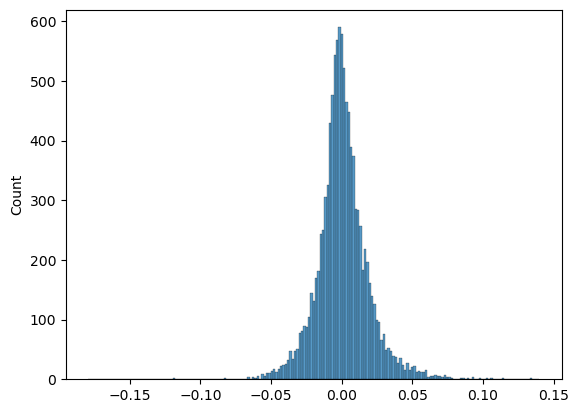

In [44]:
sns.histplot(diffs)

In [46]:
#Особо никаких выводов не сделаешь

In [48]:
diffs = np.array(diffs)

(diffs > 0.015).mean()

0.17101098491900948

In [50]:
(diffs < -0.005).mean()

0.34583876373114875

### Более короткие таргеты

##### 1 day = 14 часов

In [55]:
# сравним на более большой выборке
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=14)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4256.62it/s]


result
LOSE    0.64113
WIN     0.20795
DNF     0.15092
Name: proportion, dtype: float64

##### 8  часов

In [59]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=8)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:21<00:00, 4611.53it/s]


result
LOSE    0.56095
DNF     0.29086
WIN     0.14819
Name: proportion, dtype: float64

##### 4  часов

In [63]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4919.44it/s]


result
DNF     0.49347
LOSE    0.42438
WIN     0.08215
Name: proportion, dtype: float64

##### 2  часов

In [67]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=2)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5163.99it/s]


result
DNF     0.67509
LOSE    0.28652
WIN     0.03839
Name: proportion, dtype: float64

### 1 час

In [69]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=1)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5205.84it/s]


result
DNF     0.81164
LOSE    0.17276
WIN     0.01560
Name: proportion, dtype: float64

### 0.5 часа

In [98]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=0.5)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:18<00:00, 5371.54it/s]


result
DNF     0.90213
LOSE    0.09218
WIN     0.00569
Name: proportion, dtype: float64

### ToFuture

In [71]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.01, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4893.18it/s]


result
LOSE    0.41534
DNF     0.41506
WIN     0.16960
Name: proportion, dtype: float64

In [72]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.01, hours_to_wait=2)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5025.42it/s]


result
DNF     0.62249
LOSE    0.28368
WIN     0.09383
Name: proportion, dtype: float64

In [100]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.01, hours_to_wait=1)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5228.48it/s]


result
DNF     0.78424
LOSE    0.17211
WIN     0.04365
Name: proportion, dtype: float64

In [102]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.01, hours_to_wait=0.5)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:18<00:00, 5365.35it/s]


result
DNF     0.89002
LOSE    0.09204
WIN     0.01794
Name: proportion, dtype: float64

### Alternative

In [104]:
df_result = get_df_target(df, indx, percent_first=0.99, percent_second=1.01, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5072.69it/s]


result
DNF     0.62087
WIN     0.19150
LOSE    0.18763
Name: proportion, dtype: float64

In [105]:
df_result = get_df_target(df, indx, percent_first=0.99, percent_second=1.01, hours_to_wait=2)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5183.99it/s]


result
DNF     0.79924
WIN     0.10144
LOSE    0.09932
Name: proportion, dtype: float64

In [107]:
df_result = get_df_target(df, indx, percent_first=0.99, percent_second=1.01, hours_to_wait=1)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:18<00:00, 5298.11it/s]


result
DNF     0.90936
WIN     0.04601
LOSE    0.04463
Name: proportion, dtype: float64

In [109]:
df_result = get_df_target(df, indx, percent_first=0.99, percent_second=1.01, hours_to_wait=0.5)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:18<00:00, 5352.29it/s]


result
DNF     0.96364
WIN     0.01857
LOSE    0.01779
Name: proportion, dtype: float64

In [88]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.005, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4788.49it/s]


result
WIN     0.37861
LOSE    0.36958
DNF     0.25181
Name: proportion, dtype: float64

In [89]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.005, hours_to_wait=2)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4934.09it/s]


result
DNF     0.47100
LOSE    0.26487
WIN     0.26413
Name: proportion, dtype: float64

In [111]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.005, hours_to_wait=1)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4984.99it/s]


result
DNF     0.67135
LOSE    0.16606
WIN     0.16259
Name: proportion, dtype: float64

In [112]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.005, hours_to_wait=0.5)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5214.95it/s]


result
DNF     0.82125
LOSE    0.09050
WIN     0.08825
Name: proportion, dtype: float64

### Alternative 2

In [176]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4902.89it/s]


result
DNF     0.49435
LOSE    0.42619
WIN     0.07946
Name: proportion, dtype: float64

In [182]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.02, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:20<00:00, 4902.10it/s]


result
DNF     0.53027
LOSE    0.42831
WIN     0.04142
Name: proportion, dtype: float64

In [205]:
df_result = get_df_target(df, indx, percent_first=0.99, percent_second=1.02, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5153.78it/s]


result
DNF     0.75767
LOSE    0.19421
WIN     0.04812
Name: proportion, dtype: float64

In [189]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.03, hours_to_wait=4)
df_result['result'].value_counts(normalize=True)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5003.24it/s]


result
DNF     0.55742
LOSE    0.42928
WIN     0.01330
Name: proportion, dtype: float64

##### Исследование

In [224]:
percents = np.arange(0.010, 0.031, 0.001)
wins = []
loses = []
for percent in percents:
    df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1+percent, hours_to_wait=4)

    wins += [df_result['result'].value_counts(normalize=True).loc['WIN']]
    loses += [df_result['result'].value_counts(normalize=True).loc['LOSE']]

100%|█████████████████████████████████████████████████████████████████| 100000/100000 [32:21<00:00, 51.49it/s]


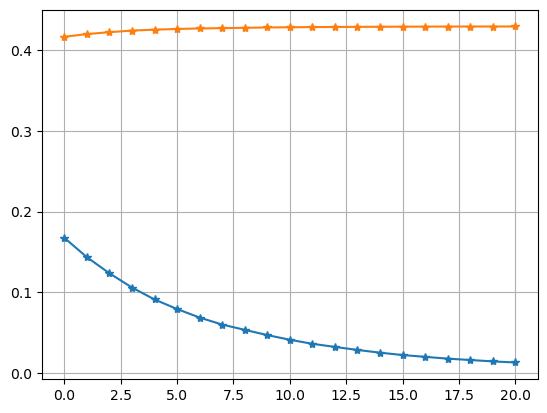

In [236]:
plt.plot(wins, '*-')
plt.plot(loses, '*-')
plt.grid()

In [238]:
percents

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 ])

In [ ]:
#Посмотреть на графики

In [ ]:
И все таки я думаю пока в пользу 0.995 - 1.015 на основе НЛМК, понять парня

In [203]:
df_result

,ind,time,close,result,ticker,delta_time,res_price,res_ind
0,8024317,2024-02-05 20:43:00,2885.00,DNF,OZON,-1,-1.000,-1
1,7816854,2023-01-25 14:42:00,1616.50,DNF,OZON,-1,-1.000,-1
2,2796917,2023-01-03 10:27:00,26.07,DNF,SNGSP,-1,-1.000,-1
3,5904043,2024-10-15 20:25:00,55.28,LOSE,ALRS,0 days 13:55:00,54.950,5904263
4,109816,2023-04-12 13:29:00,177.75,DNF,GAZP,-1,-1.000,-1
...,...,...,...,...,...,...,...,...
99995,4168177,2023-01-16 11:30:00,113.14,DNF,NLMK,-1,-1.000,-1
99996,5857075,2024-07-25 16:09:00,63.30,DNF,ALRS,-1,-1.000,-1
99997,8504038,2024-03-11 22:14:00,34.56,LOSE,RUAL,0 days 12:35:00,34.385,8504166
99998,5411907,2024-08-23 10:30:00,197.15,LOSE,MTSS,0 days 00:07:00,196.050,5411914


### Итог: Рассмотрим детальнее percent_first=0.995, percent_second=1.005, hours_to_wait=1

In [117]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.005, hours_to_wait=1)

100%|███████████████████████████████████████████████████████████████| 100000/100000 [00:19<00:00, 5161.23it/s]


In [119]:
df_result['result'].value_counts(normalize=True)

result
DNF     0.67135
LOSE    0.16606
WIN     0.16259
Name: proportion, dtype: float64

In [124]:
df_result['delta_time_hours'] = None
mask = df_result['result'] != 'DNF'
df_result.loc[mask, 'delta_time_hours'] = np.ceil(df_result.loc[mask, 'delta_time'] / pd.Timedelta(hours=1))
df_result.loc[~mask, 'delta_time_hours'] = 42

<Axes: xlabel='delta_time_hours'>

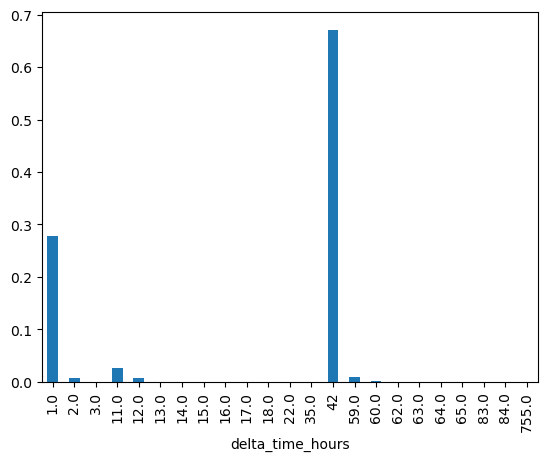

In [126]:
#распределение по длительности
df_result['delta_time_hours'].value_counts(normalize=True).sort_index().plot.bar()

In [129]:
#TR по времени ожидания

In [131]:
df_result['target'] = (df_result['result'] == 'WIN').astype(int)

<Axes: xlabel='delta_time_hours'>

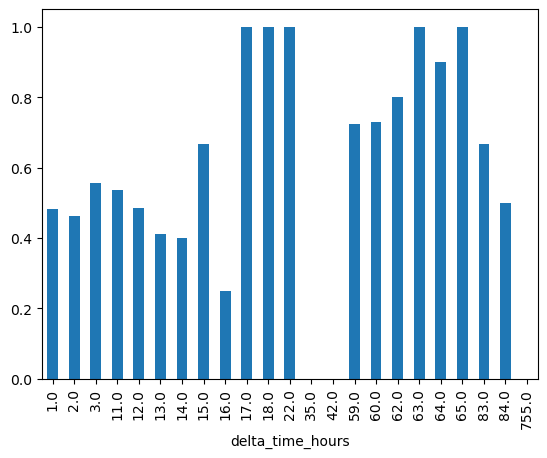

In [133]:
df_result.groupby('delta_time_hours').target.mean().sort_index().plot.bar()

In [137]:
#TR во времени

<Axes: xlabel='time'>

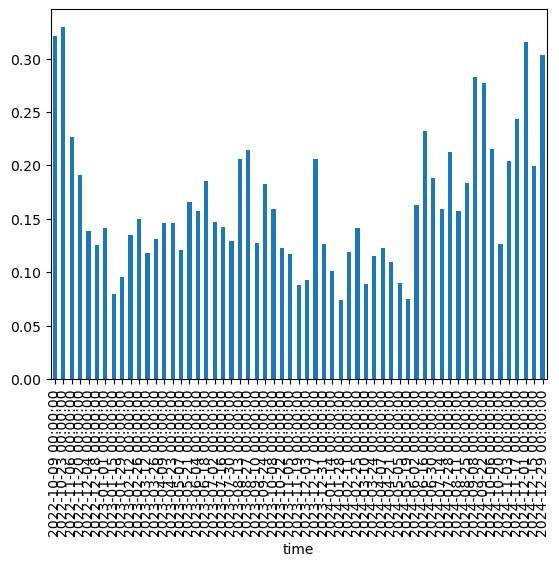

In [139]:
df_result.groupby(pd.Grouper(key='time', freq='2W')).target.mean().sort_index().plot.bar()

<Axes: xlabel='time'>

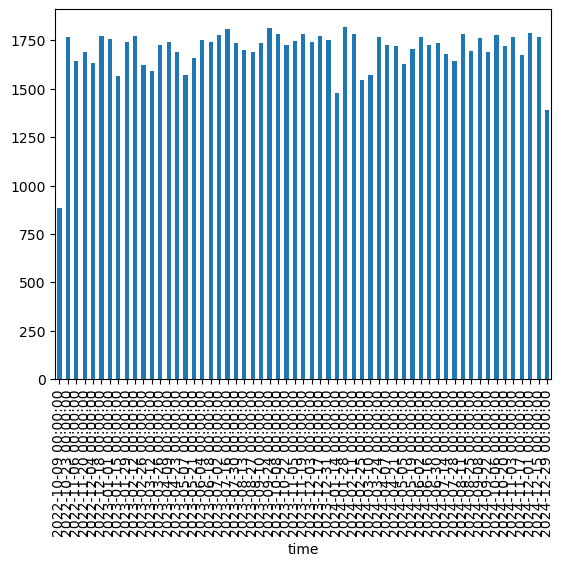

In [141]:
#перепроверка, кол-во точек в каждом месяце
df_result.groupby(pd.Grouper(key='time', freq='2W')).target.count().sort_index().plot.bar()

<Axes: xlabel='ticker'>

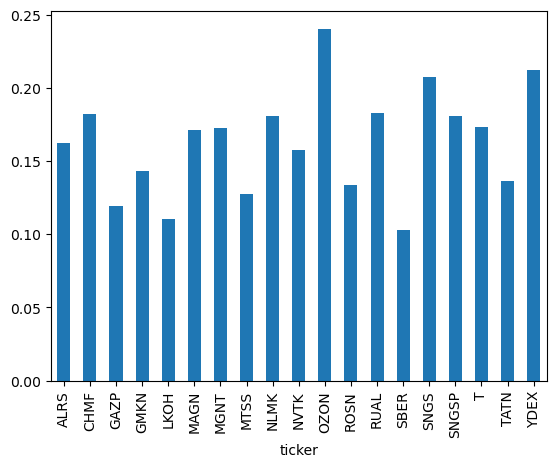

In [144]:
#по акциям
df_result.groupby('ticker').target.mean().sort_index().plot.bar()

<Axes: xlabel='ticker'>

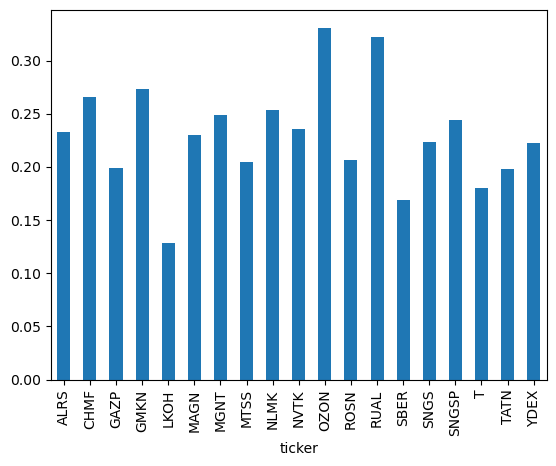

In [147]:
# по компаниям за два последних месяца
mask = df_result['time'] > datetime.datetime(2024, 10, 1)
df_result.loc[mask, :].groupby('ticker').target.mean().sort_index().plot.bar()

In [150]:
#Ок, пойдем дальше грызть гранит науки!

In [111]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=8)

100%|█████████████████████████████████████████████████████████████| 1000000/1000000 [03:35<00:00, 4634.77it/s]


In [112]:
#по дню выполнения посмотреть

In [113]:
df_result['result'].value_counts()

result
LOSE    539995
DNF     269912
WIN     190093
Name: count, dtype: int64

In [127]:
df_result['delta_time_days'] = None
mask = df_result['result'] != 'DNF'
df_result.loc[mask, 'delta_time_days'] = np.ceil(df_result.loc[mask, 'delta_time'] / pd.Timedelta(hours=1))
df_result.loc[~mask, 'delta_time_days'] = -10

<Axes: xlabel='delta_time_days'>

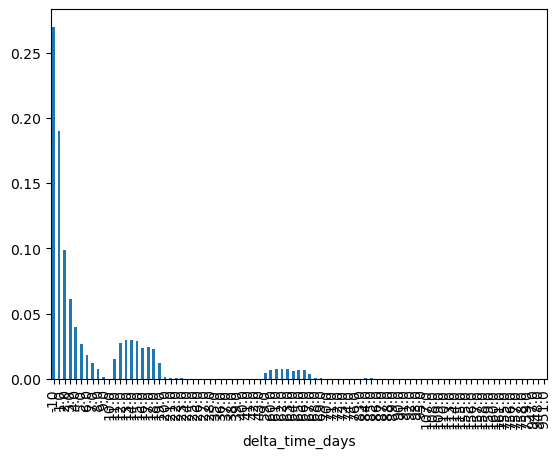

In [128]:
#распределение по длительности
df_result['delta_time_days'].value_counts(normalize=True).sort_index().plot.bar()

In [116]:
#TR по часам ожидания

In [117]:
df_result['target'] = (df_result['result'] == 'WIN').astype(int)

<Axes: xlabel='delta_time_days'>

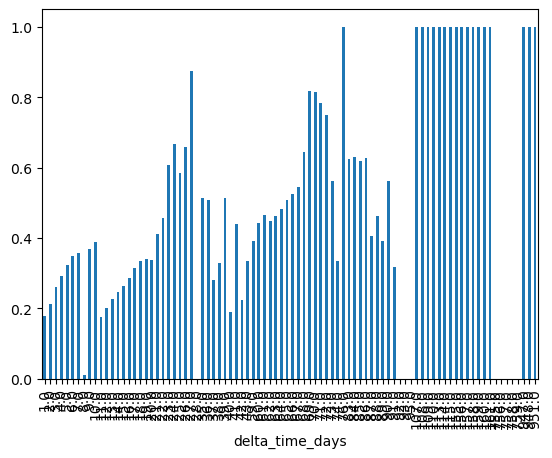

In [118]:
df_result.groupby('delta_time_days').target.mean().sort_index().plot.bar()

In [119]:
#TR во времени

<Axes: xlabel='time'>

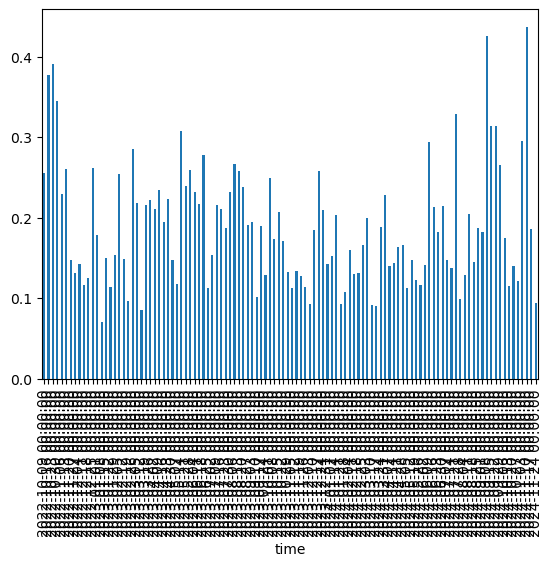

In [120]:
df_result.groupby(pd.Grouper(key='time', freq='W')).target.mean().sort_index().plot.bar()

<Axes: xlabel='time'>

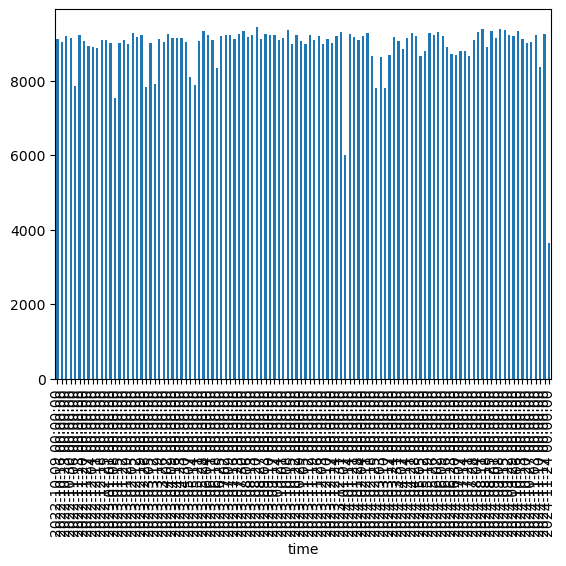

In [121]:
#перепроверка, кол-во точек в каждом месяце
df_result.groupby(pd.Grouper(key='time', freq='W')).target.count().sort_index().plot.bar()

<Axes: xlabel='time'>

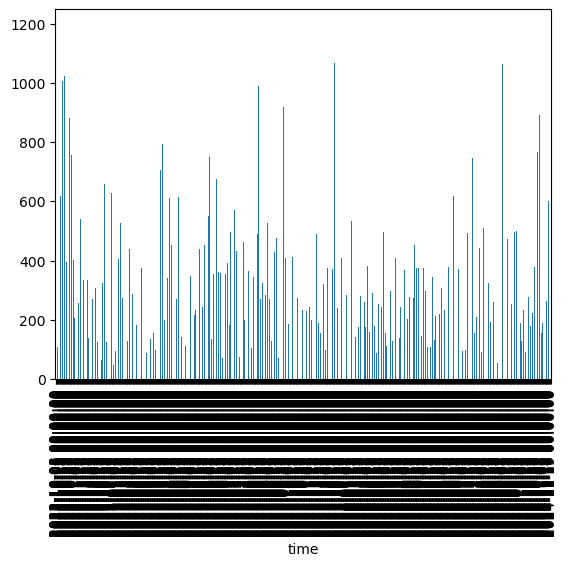

In [122]:
#распределение по дням
df_result.groupby(pd.Grouper(key='time', freq='D')).target.sum().sort_index().plot.bar()

<Axes: xlabel='ticker'>

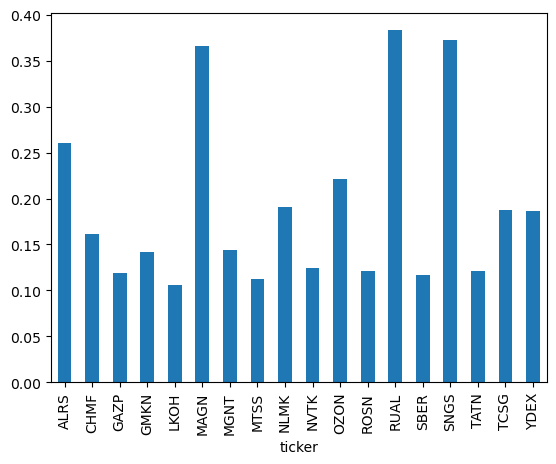

In [123]:
#по акциям
df_result.groupby('ticker').target.mean().sort_index().plot.bar()

<Axes: xlabel='ticker'>

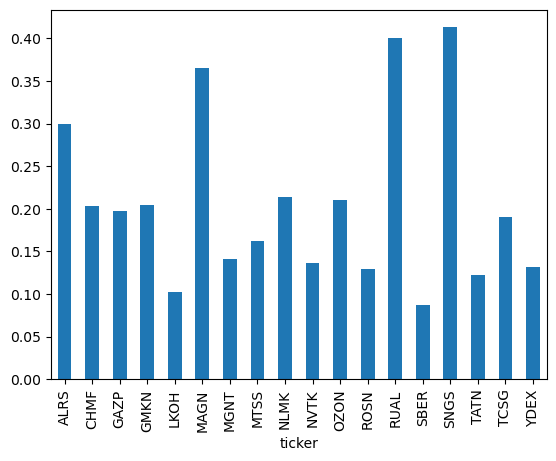

In [124]:
# по компаниям за два последних месяца
mask = df_result['time'] > datetime.datetime(2024, 10, 1)
df_result.loc[mask, :].groupby('ticker').target.mean().sort_index().plot.bar()

In [129]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=4)

100%|█████████████████████████████████████████████████████████████| 1000000/1000000 [03:23<00:00, 4909.49it/s]


In [130]:
#по дню выполнения посмотреть

In [131]:
df_result['result'].value_counts()

result
DNF     464036
LOSE    414009
WIN     121955
Name: count, dtype: int64

In [132]:
df_result['delta_time_days'] = None
mask = df_result['result'] != 'DNF'
df_result.loc[mask, 'delta_time_days'] = np.ceil(df_result.loc[mask, 'delta_time'] / pd.Timedelta(hours=1))
df_result.loc[~mask, 'delta_time_days'] = -1

<Axes: xlabel='delta_time_days'>

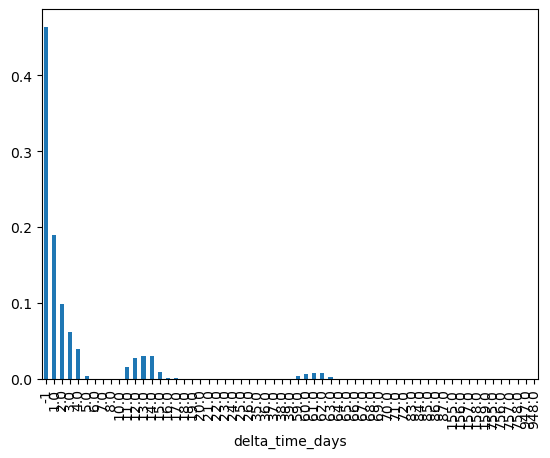

In [133]:
#распределение по длительности
df_result['delta_time_days'].value_counts(normalize=True).sort_index().plot.bar()

In [88]:
#TR по часам ожидания

In [135]:
df_result['target'] = (df_result['result'] == 'WIN').astype(int)

<Axes: xlabel='delta_time_days'>

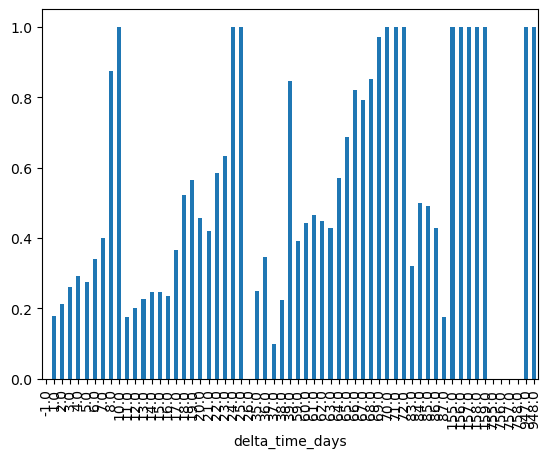

In [136]:
df_result.groupby('delta_time_days').target.mean().sort_index().plot.bar()

In [137]:
#TR во времени

<Axes: xlabel='time'>

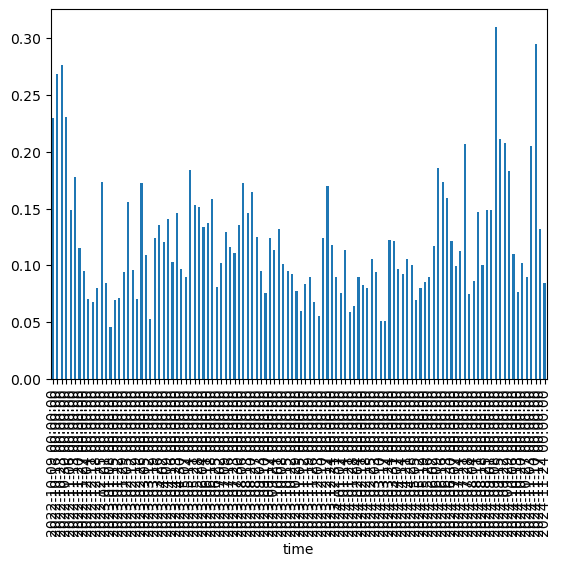

In [138]:
df_result.groupby(pd.Grouper(key='time', freq='W')).target.mean().sort_index().plot.bar()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_41472/2486965488.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_result.groupby(pd.Grouper(key='time', freq='M')).target.mean().sort_index().plot.bar()


<Axes: xlabel='time'>

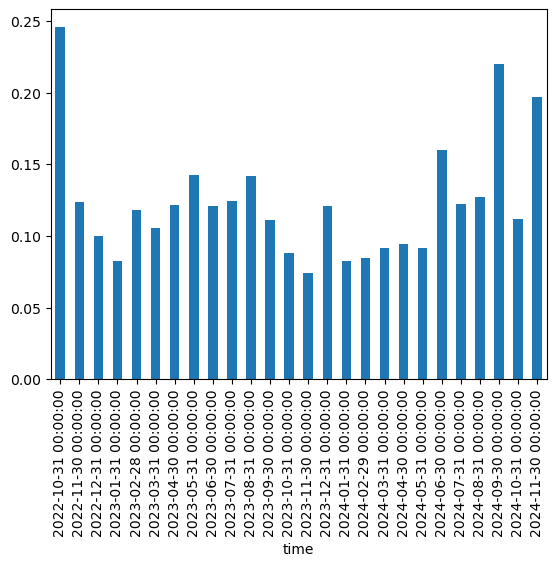

In [140]:
df_result.groupby(pd.Grouper(key='time', freq='M')).target.mean().sort_index().plot.bar()

/var/folders/rm/zt5_90s5727289mv2gzbkw980000gn/T/ipykernel_41472/539452958.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()


<Axes: xlabel='time'>

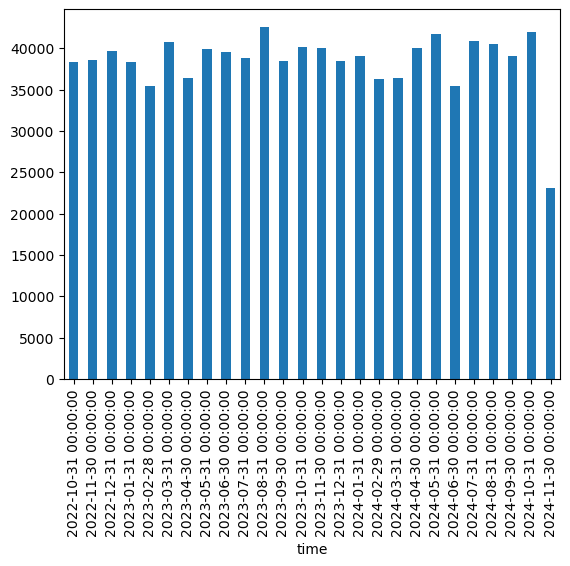

In [139]:
#перепроверка, кол-во точек в каждом месяце
df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()

<Axes: xlabel='ticker'>

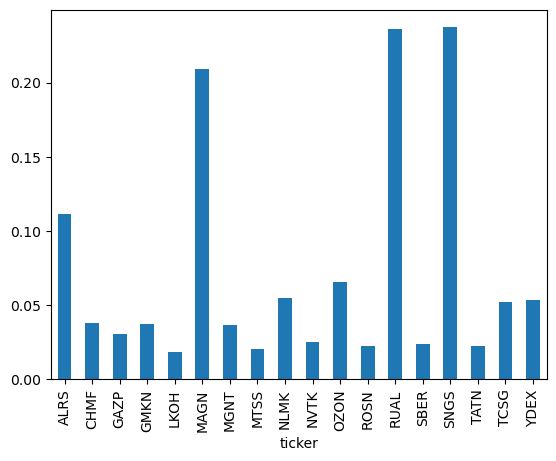

In [94]:
#по акциям
df_result.groupby('ticker').target.mean().sort_index().plot.bar()

<Axes: xlabel='ticker'>

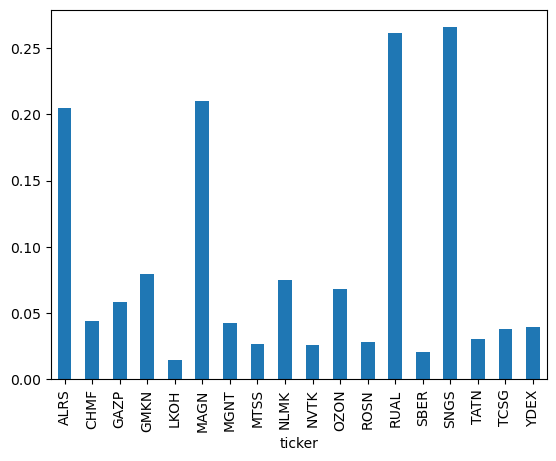

In [95]:
# по компаниям за два последних месяца
mask = df_result['time'] > datetime.datetime(2024, 10, 1)
df_result.loc[mask, :].groupby('ticker').target.mean().sort_index().plot.bar()

In [29]:
df_result = get_df_target(df, indx, percent_first=0.995, percent_second=1.015, hours_to_wait=2)

 40%|█████████████████████████▊                                      | 40340/100000 [00:07<00:11, 5262.59it/s]


KeyboardInterrupt: 

In [ ]:
#по дню выполнения посмотреть

In [ ]:
df_result['result'].value_counts()

In [ ]:
df_result['delta_time_days'] = None
mask = df_result['result'] != 'DNF'
df_result.loc[mask, 'delta_time_days'] = np.ceil(df_result.loc[mask, 'delta_time'] / pd.Timedelta(hours=0.5))
df_result.loc[~mask, 'delta_time_days'] = 8

In [ ]:
#распределение по длительности
df_result['delta_time_days'].value_counts(normalize=True).sort_index().plot.bar()

In [ ]:
#TR по дням ожидания

In [ ]:
df_result['target'] = (df_result['result'] == 'WIN').astype(int)

In [ ]:
df_result.groupby('delta_time_days').target.mean().sort_index().plot.bar()

In [ ]:
#TR во времени

In [ ]:
df_result.groupby(pd.Grouper(key='time', freq='W')).target.mean().sort_index().plot.bar()

In [ ]:
#перепроверка, кол-во точек в каждом месяце
df_result.groupby(pd.Grouper(key='time', freq='M')).target.count().sort_index().plot.bar()

In [ ]:
#распределение по дням
df_result.groupby(pd.Grouper(key='time', freq='D')).target.sum().sort_index().plot.bar()

In [ ]:
#по акциям
df_result.groupby('ticker').target.mean().sort_index().plot.bar()

In [ ]:
# по компаниям за два последних месяца
mask = df_result['time'] > datetime.datetime(2024, 10, 1)
df_result.loc[mask, :].groupby('ticker').target.mean().sort_index().plot.bar()